In [1]:
""", con=DB_CONN)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-8989a84d30be>, line 2)

In [2]:
from pathlib import Path
import pandas as pd
import sqlite3


In [3]:
ZERO_ADDRESS =	'0x0000000000000000000000000000000000000000'
DB_CONN = sqlite3.connect('./db/inspector.db')
DB_CURS = DB_CONN.cursor()


In [4]:
sql = """SELECT sender,
receiver,
SUM(tokens) AS tokens,
COUNT(sender) AS num_of_transactions
FROM transactions
GROUP BY sender, receiver"""


edges = pd.read_sql(sql, con=DB_CONN)


In [5]:
edges

,sender,receiver,tokens,num_of_transactions
0,0x0000000000000000000000000000000000000000,0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a,1.000000e+10,1
1,0x000000000000084e91743124a982076c59f10084,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,5.116233e+05,1
2,0x0000000000003f5e74c1ba8a66b48e6f3d71ae82,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,3.103003e+03,2
3,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9,3.482785e+06,1
4,0x000000000035b5e5ad9019092c665357240f594e,0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f,6.040456e+06,7
...,...,...,...,...
8413,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xb600ae175085babf35cf3ddf8d1b0e739a380efc,1.610000e+05,1
8414,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xc1e93213c739964ab456b05e4b56cc19012488d0,5.008621e+05,1
8415,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xe2dfe759be413d5cc95f0343d0324e84801aede9,4.962701e+05,1
8416,0xffe0e82d8f8947fe653b1f8ad1f609a9d5d31972,0x365cc3974e99834c278872dfa53df96650caca6f,5.000000e+01,1


In [6]:
node_sql = """
SELECT DISTINCT wallet
FROM wallets"""

In [7]:
nodes = pd.read_sql(node_sql, con=DB_CONN)

In [8]:
nodes

,wallet
0,0x0000000000000000000000000000000000000000
1,0x000000000000084e91743124a982076c59f10084
2,0x0000000000003f5e74c1ba8a66b48e6f3d71ae82
3,0x0000000000005117dd3a72e64a705198753fdd54
4,0x0000000000007f150bd6f54c40a34d7c3d5e9f56
...,...
4158,0xffa441aa38eb0b5c83cde775b56fdb33236f8159
4159,0xffd10553261fd86fb5d70513fb18ef1d47b7da0e
4160,0xffe0e82d8f8947fe653b1f8ad1f609a9d5d31972
4161,0xfff5eb5777790328b9f58db36e74deb5b2b6af1f


In [9]:
type(nodes)

pandas.core.frame.DataFrame

In [10]:
nodes_list = list(nodes['wallet'])

In [11]:
nodes_list

['0x0000000000000000000000000000000000000000',
 '0x000000000000084e91743124a982076c59f10084',
 '0x0000000000003f5e74c1ba8a66b48e6f3d71ae82',
 '0x0000000000005117dd3a72e64a705198753fdd54',
 '0x0000000000007f150bd6f54c40a34d7c3d5e9f56',
 '0x00000000000a47b1298f18cf67de547bbe0d723f',
 '0x00000000000e1d0dabf7b7c7b68866fc940d0db8',
 '0x000000000035b5e5ad9019092c665357240f594e',
 '0x00000000003b3cc22af3ae1eac0440bcee416b40',
 '0x00000000008c4fb1c916e0c88fd4cc402d935e7d',
 '0x0000000000cc2f88402b31ca4045f37bf79f3e59',
 '0x0000000000d41c96294ccdac8612bdfe29c641af',
 '0x0000000000d9455cc7eb92d06e00582a982f68fe',
 '0x000000005736775feb0c8568e7dee77222a26880',
 '0x00000000726422a6fecb4759b44d47e48cf746aa',
 '0x00000000c2cf7648c169b25ef1c217864bfa38cc',
 '0x000000a60073b3ab5258ec72f46c002ad912ed76',
 '0x000000bd31c24a2bd2835028c8f1e4d9d3f37108',
 '0x0003a4de902c52b1c6825d88ecd93cc5a70afe44',
 '0x001c29d63b2fcd589f4fa16aaae7f9d9c3e76225',
 '0x00261a5833990bbd29faf143b3d3224fc796063e',
 '0x002763bf5

In [12]:
import networkx as nx

In [13]:
G = nx.Graph()

In [14]:
G.add_nodes_from(nodes_list)

In [15]:
G

In [16]:
G.show()


AttributeError: 'Graph' object has no attribute 'show'

In [17]:
G.display(
)

AttributeError: 'Graph' object has no attribute 'display'

In [18]:
G.display()

AttributeError: 'Graph' object has no attribute 'display'

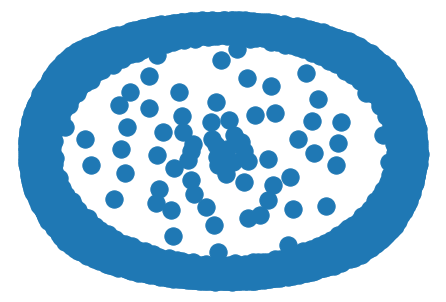

In [19]:
nx.draw(G)

In [20]:
edges

,sender,receiver,tokens,num_of_transactions
0,0x0000000000000000000000000000000000000000,0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a,1.000000e+10,1
1,0x000000000000084e91743124a982076c59f10084,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,5.116233e+05,1
2,0x0000000000003f5e74c1ba8a66b48e6f3d71ae82,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,3.103003e+03,2
3,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9,3.482785e+06,1
4,0x000000000035b5e5ad9019092c665357240f594e,0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f,6.040456e+06,7
...,...,...,...,...
8413,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xb600ae175085babf35cf3ddf8d1b0e739a380efc,1.610000e+05,1
8414,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xc1e93213c739964ab456b05e4b56cc19012488d0,5.008621e+05,1
8415,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xe2dfe759be413d5cc95f0343d0324e84801aede9,4.962701e+05,1
8416,0xffe0e82d8f8947fe653b1f8ad1f609a9d5d31972,0x365cc3974e99834c278872dfa53df96650caca6f,5.000000e+01,1


In [21]:
edges_tuple = list(edges[['sender', 'receiver']])


In [22]:
edges_tuple

['sender', 'receiver']

In [23]:
edges

,sender,receiver,tokens,num_of_transactions
0,0x0000000000000000000000000000000000000000,0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a,1.000000e+10,1
1,0x000000000000084e91743124a982076c59f10084,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,5.116233e+05,1
2,0x0000000000003f5e74c1ba8a66b48e6f3d71ae82,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7,3.103003e+03,2
3,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9,3.482785e+06,1
4,0x000000000035b5e5ad9019092c665357240f594e,0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f,6.040456e+06,7
...,...,...,...,...
8413,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xb600ae175085babf35cf3ddf8d1b0e739a380efc,1.610000e+05,1
8414,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xc1e93213c739964ab456b05e4b56cc19012488d0,5.008621e+05,1
8415,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xe2dfe759be413d5cc95f0343d0324e84801aede9,4.962701e+05,1
8416,0xffe0e82d8f8947fe653b1f8ad1f609a9d5d31972,0x365cc3974e99834c278872dfa53df96650caca6f,5.000000e+01,1


In [24]:
edges_tuple = list(edges['sender', 'receiver'])


KeyError: ('sender', 'receiver')

In [25]:
edges_tuple = list(edges[['sender', 'receiver']])


In [26]:
edges_tuple

['sender', 'receiver']

In [27]:
edges_tuple = edges[['sender', 'receiver']]

In [28]:
edges_tuple

,sender,receiver
0,0x0000000000000000000000000000000000000000,0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a
1,0x000000000000084e91743124a982076c59f10084,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7
2,0x0000000000003f5e74c1ba8a66b48e6f3d71ae82,0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7
3,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9
4,0x000000000035b5e5ad9019092c665357240f594e,0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f
...,...,...
8413,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xb600ae175085babf35cf3ddf8d1b0e739a380efc
8414,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xc1e93213c739964ab456b05e4b56cc19012488d0
8415,0xffa441aa38eb0b5c83cde775b56fdb33236f8159,0xe2dfe759be413d5cc95f0343d0324e84801aede9
8416,0xffe0e82d8f8947fe653b1f8ad1f609a9d5d31972,0x365cc3974e99834c278872dfa53df96650caca6f


In [29]:
edges_sender = list(edges['sender'])
edges_receiver = list(edges['receiver'])

In [30]:
edges_sender

['0x0000000000000000000000000000000000000000',
 '0x000000000000084e91743124a982076c59f10084',
 '0x0000000000003f5e74c1ba8a66b48e6f3d71ae82',
 '0x0000000000007f150bd6f54c40a34d7c3d5e9f56',
 '0x000000000035b5e5ad9019092c665357240f594e',
 '0x000000000035b5e5ad9019092c665357240f594e',
 '0x000000000035b5e5ad9019092c665357240f594e',
 '0x00000000003b3cc22af3ae1eac0440bcee416b40',
 '0x00000000003b3cc22af3ae1eac0440bcee416b40',
 '0x00000000003b3cc22af3ae1eac0440bcee416b40',
 '0x00000000008c4fb1c916e0c88fd4cc402d935e7d',
 '0x0000000000cc2f88402b31ca4045f37bf79f3e59',
 '0x0000000000d41c96294ccdac8612bdfe29c641af',
 '0x0000000000d41c96294ccdac8612bdfe29c641af',
 '0x0000000000d41c96294ccdac8612bdfe29c641af',
 '0x0000000000d9455cc7eb92d06e00582a982f68fe',
 '0x0000000000d9455cc7eb92d06e00582a982f68fe',
 '0x0000000000d9455cc7eb92d06e00582a982f68fe',
 '0x000000005736775feb0c8568e7dee77222a26880',
 '0x00000000726422a6fecb4759b44d47e48cf746aa',
 '0x00000000726422a6fecb4759b44d47e48cf746aa',
 '0x000000007

In [31]:
edges_receiver

['0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x972663716f3dbead648eeb82b79adadd27907185',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f',
 '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7',
 '0xdd51121d1

In [32]:
edges_zipped = zip(edges_sender, edges_receiver)


In [33]:
edges_zipped 

In [34]:
edges_zipped = list(zip(edges_sender, edges_receiver))

In [35]:
edges_zipped

[('0x0000000000000000000000000000000000000000',
  '0xf0e3ea754d038b979cd0124e2f1a4bf44f32746a'),
 ('0x000000000000084e91743124a982076c59f10084',
  '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7'),
 ('0x0000000000003f5e74c1ba8a66b48e6f3d71ae82',
  '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7'),
 ('0x0000000000007f150bd6f54c40a34d7c3d5e9f56',
  '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9'),
 ('0x000000000035b5e5ad9019092c665357240f594e',
  '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f'),
 ('0x000000000035b5e5ad9019092c665357240f594e',
  '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7'),
 ('0x000000000035b5e5ad9019092c665357240f594e',
  '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9'),
 ('0x00000000003b3cc22af3ae1eac0440bcee416b40',
  '0x4478c3af95269e48aaa2fa4fbd2231df4aeab43f'),
 ('0x00000000003b3cc22af3ae1eac0440bcee416b40',
  '0xdac9b2c7a5a8e2163b4161e34c2148e11b51fcc7'),
 ('0x00000000003b3cc22af3ae1eac0440bcee416b40',
  '0xdd51121d1efc398b4c09fd0cb84d79ae2c923fc9'),
 ('0x00000000008c4fb1c916e0c88

In [36]:
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edges_zipped)

In [37]:
G.draw()

AttributeError: 'Graph' object has no attribute 'draw'

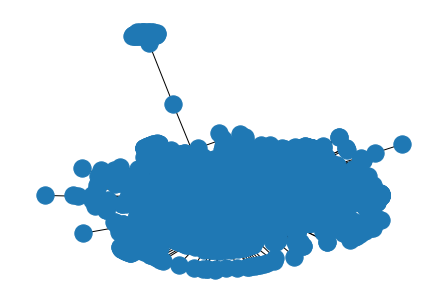

In [38]:
nx.draw(G)

In [39]:
import matplotlib.pyplot as plt

In [40]:
G = nx.star_graph(20)

In [41]:
G.add_nodes_from(nodes_list)
G.add_edges_from(edges_zipped)

In [42]:
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}

In [43]:
nx.draw(G, pos, **options)
plt.show()

NameError: name 'pos' is not defined

In [44]:
pos = nx.spring_layout(G, seed=63)

ValueError: Invalid RGBA argument: 0

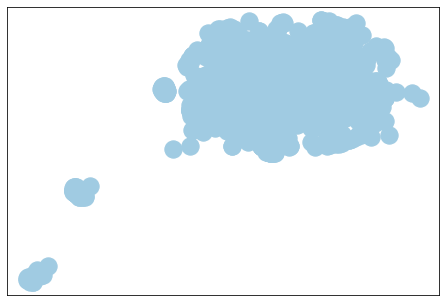

In [45]:

nx.draw(G, pos, **options)
plt.show()

In [46]:
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}


NetworkXError: Node 0 has no position.

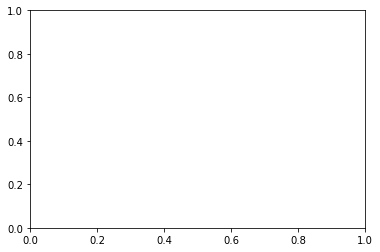

In [47]:

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)


In [48]:
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

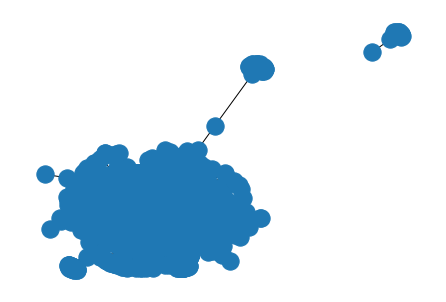

In [49]:
nx.draw(G)

In [50]:
options = {
    "font_size": 36,
    "node_size": 30,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

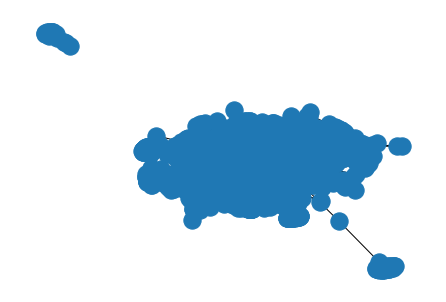

In [51]:

nx.draw(G)

In [52]:
options = {
    "font_size": 10,
    "node_size": 30,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

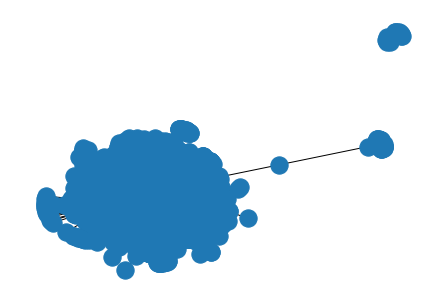

In [53]:


nx.draw(G)